In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [4]:
#Read income group by zip information into data frame
incomegroup_df = pd.read_excel (r'2018 St Louis County Income Cat by Zip clean.xlsx')
incomegroup_df

,Unnamed: 0,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,63005,0.030897,0.015841,0.010508,0.010351,0.003294,0.017409,0.031368,0.022114,0.010038,0.037014,0.040307,0.079360,0.082497,0.070263,0.150565,0.388174
1,63011,0.009928,0.010687,0.027441,0.024959,0.019167,0.029785,0.025924,0.035507,0.052055,0.067223,0.074393,0.129895,0.117830,0.103971,0.114727,0.156509
2,63017,0.043912,0.015640,0.018046,0.036513,0.026588,0.019791,0.026468,0.031280,0.022919,0.052154,0.072486,0.105149,0.097991,0.080426,0.129211,0.221427
3,63021,0.016861,0.014348,0.026502,0.025908,0.031940,0.038108,0.037012,0.037651,0.026456,0.082888,0.099566,0.135709,0.110761,0.079735,0.106694,0.129861
4,63025,0.015434,0.013830,0.029465,0.013830,0.016236,0.027060,0.024654,0.029264,0.035077,0.053718,0.092002,0.122469,0.147124,0.097414,0.159952,0.122469
5,63026,0.031727,0.024187,0.029073,0.034743,0.036432,0.046384,0.041076,0.034260,0.028832,0.074251,0.099946,0.169914,0.112130,0.088365,0.072501,0.076181
6,63031,0.040755,0.022857,0.038988,0.046968,0.046398,0.053409,0.064466,0.047766,0.037620,0.097868,0.115424,0.158801,0.114683,0.048849,0.039672,0.025479
7,63033,0.048737,0.027555,0.047675,0.055759,0.057706,0.049150,0.059653,0.058886,0.044666,0.110633,0.099068,0.148631,0.100720,0.040831,0.032629,0.017701
8,63034,0.045885,0.013089,0.020460,0.022867,0.027531,0.011584,0.027230,0.011434,0.041522,0.093426,0.086505,0.160674,0.171205,0.101249,0.101700,0.063638
9,63038,0.006039,0.010870,0.016103,0.016103,0.036634,0.006844,0.014493,0.035829,0.014895,0.056763,0.053140,0.077697,0.124799,0.096216,0.160628,0.272947


In [5]:
print(incomegroup_df.columns)

Index(['Unnamed: 0', 'Less than $10,000', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999',
       '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999',
       '$45,000 to $49,999', '$50,000 to $59,999', '$60,000 to $74,999',
       '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999',
       '$150,000 to $199,999', '$200,000 or more'],
      dtype='object')


In [16]:
Rename the column of Zip Code
incomegroup_df.rename(columns={'Unnamed: 0':'Zip Code'}, inplace=True)
#incomegroup_df

In [19]:
#Regroup income groups
zipcode = incomegroup_df["Zip Code"]
incomebelow25k = incomegroup_df["Less than $10,000"] + incomegroup_df["$10,000 to $14,999"] + incomegroup_df["$15,000 to $19,999"] + incomegroup_df["$20,000 to $24,999"]
income25toless50k = incomegroup_df["$25,000 to $29,999"] + incomegroup_df["$30,000 to $34,999"] + incomegroup_df["$35,000 to $39,999"] + incomegroup_df["$40,000 to $44,999"] + incomegroup_df["$45,000 to $49,999"]
income50ktoless100k = incomegroup_df["$50,000 to $59,999"] + incomegroup_df["$60,000 to $74,999"] + incomegroup_df["$75,000 to $99,999"] 
income100ktoless200k = incomegroup_df["$100,000 to $124,999"] + incomegroup_df["$125,000 to $149,999"] + incomegroup_df["$150,000 to $199,999"]
income200kplus =  incomegroup_df["$200,000 or more"]

In [25]:
#New data frame with fewer income groups
newincomegroup_df = pd.DataFrame({"Zip Code": zipcode,"Less than 25k": 100*incomebelow25k, "25k to $49999": 100*income25toless50k,"50k to $99999": 100*income50ktoless100k,"100k to $199999": 100*income100ktoless200k, "200k and plus": 100*income200kplus})
newincomegroup_df

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686


In [47]:
#business_df = pd.read_csv("St Louis County Business by Zip.csv")
#business_df

In [27]:
#Read the business number information into data frame
businessbyzip_df = pd.read_csv('stlbusinesssum.csv')
businessbyzip_df.rename(columns={'Zip':'Zip Code'}, inplace=True)

In [28]:
# Merge new income group info and the busisness info
business_incomegroup = pd.merge(newincomegroup_df,businessbyzip_df,on='Zip Code',how='outer')
business_incomegroup

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus,Sum of Business
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440,1260.0
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855,1428.0
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685,1663.0
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064,638.0
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943,373.0
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071,1085.0
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880,792.0
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120,747.0
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773,156.0
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686,98.0


In [37]:
#Import population information
population_df = pd.read_excel (r'St Louis County Zip Population.xlsx')
populationclean_df = population_df[["Zip Code", "Population"]]
#populationclean_df.rename(columns={'ZIP Code':'Zip Code'}, inplace=True)
populationclean_df

,Zip Code,Population
0,63005,17753
1,63011,36347
2,63017,41470
3,63021,56261
4,63025,13854
5,63026,44124
6,63031,48212
7,63033,43000
8,63034,17761
9,63038,6914


In [45]:
#Merge population info into the business and income DFs)
businessincomepop = pd.merge(business_incomegroup,populationclean_df,on='Zip Code',how='outer')
#businessindex = number of business per 1000 people
businessincomepop["Business Index"] = 1000*businessincomepop["Sum of Business"]/businessincomepop["Population"]
businessincomepop.head(50)

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus,Sum of Business,Population,Business Index
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440,1260.0,17753.0,70.973920
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855,1428.0,36347.0,39.287974
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685,1663.0,41470.0,40.101278
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064,638.0,56261.0,11.340005
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943,373.0,13854.0,26.923632
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071,1085.0,44124.0,24.589792
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880,792.0,48212.0,16.427445
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120,747.0,43000.0,17.372093
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773,156.0,17761.0,8.783289
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686,98.0,6914.0,14.174139


In [51]:
#Drop any missing values
combinedclean = businessincomepop.dropna()
combinedclean.head(10)

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus,Sum of Business,Population,Business Index
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440,1260.0,17753.0,70.973920
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855,1428.0,36347.0,39.287974
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685,1663.0,41470.0,40.101278
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064,638.0,56261.0,11.340005
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943,373.0,13854.0,26.923632
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071,1085.0,44124.0,24.589792
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880,792.0,48212.0,16.427445
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120,747.0,43000.0,17.372093
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773,156.0,17761.0,8.783289
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686,98.0,6914.0,14.174139


Text(0, 0.5, 'Percent of Household')

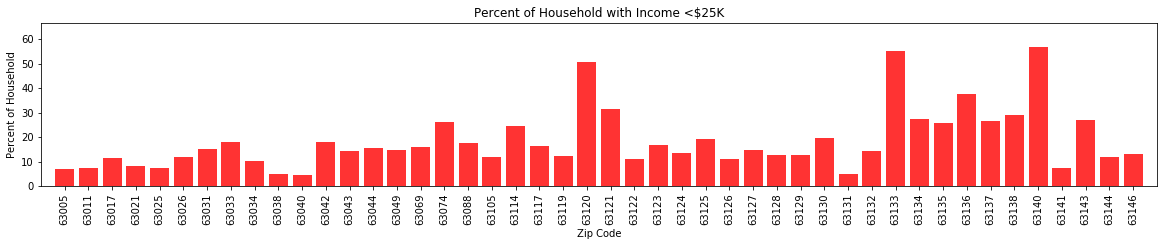

In [60]:
# Create bar plots showing
# Set x axis and tick locations
x_axis = np.arange(len(combinedclean))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Less than 25k"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Less than 25k"])+10)
plt.title("Percent of Household with Income <$25K")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

In [ ]:
# Create bar plots showing
# Set x axis and tick locations
x_axis = np.arange(len(combinedclean))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Less than 25k"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Less than 25k"])+10)
plt.title("Percent of Household with Income <$25K")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

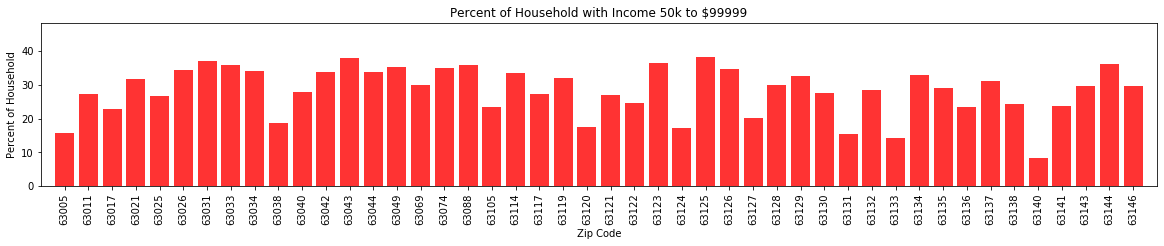

In [63]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["50k to $99999"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["50k to $99999"])+10)
plt.title("Percent of Household with Income 50k to $99999")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

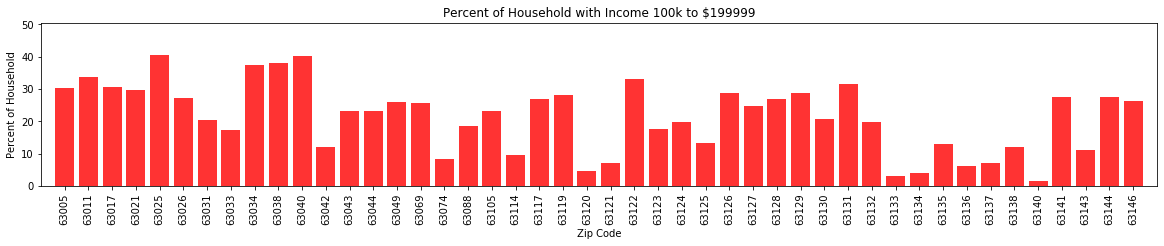

In [64]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["100k to $199999"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["100k to $199999"])+10)
plt.title("Percent of Household with Income 100k to $199999")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

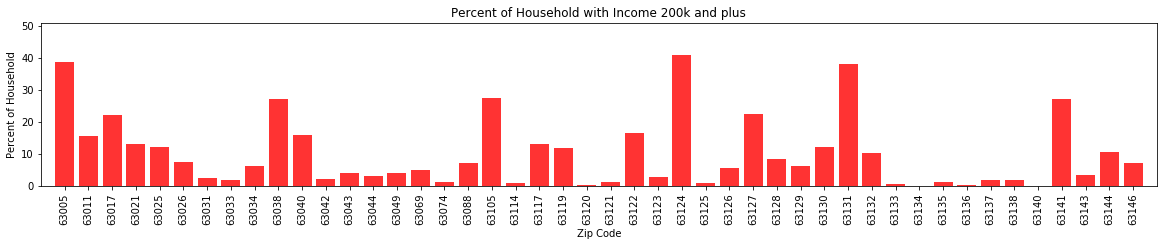

In [65]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["200k and plus"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["200k and plus"])+10)
plt.title("Percent of Household with Income 200k and plus")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Business Index')

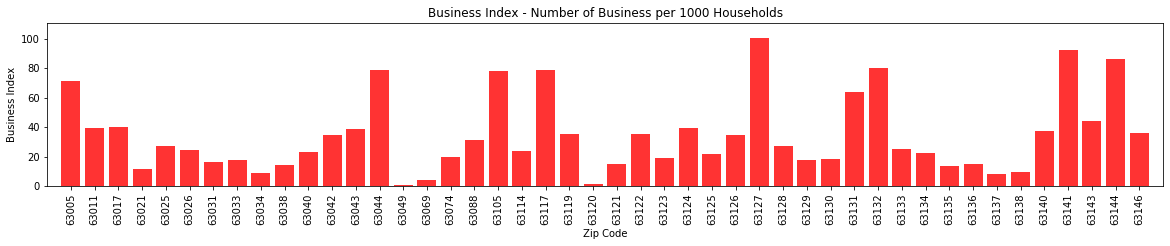

In [66]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Business Index"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Business Index"])+10)
plt.title("Business Index - Number of Business per 1000 Households")
plt.xlabel("Zip Code")
plt.ylabel("Business Index")

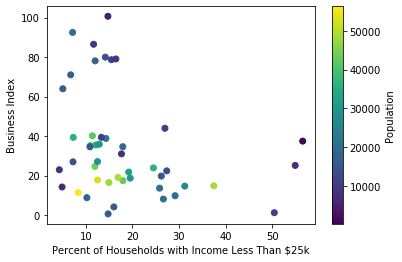

In [67]:
#Plot the low income groups with business index
plt.scatter(combinedclean["Less than 25k"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income Less Than $25k")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.08915459563634764
The p-value is: 0.043838984555990494
The regression line is: y = -0.64x + 46.07


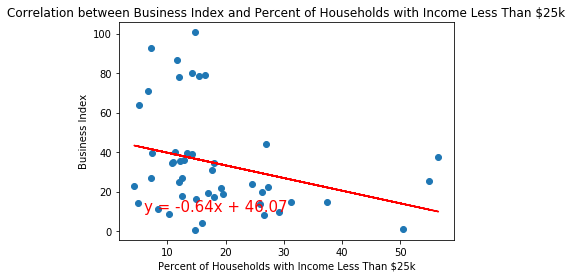

In [85]:
#Regression analysis of income group <25k with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["Less than 25k"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income Less Than $25k')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income Less Than $25k")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
print(f"The regression line is: {line_eq}")
plt.show()

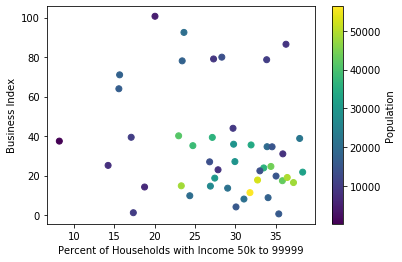

In [71]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["50k to $99999"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 50k to 99999")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.05204718898891229
The p-value is: 0.12727981326037033


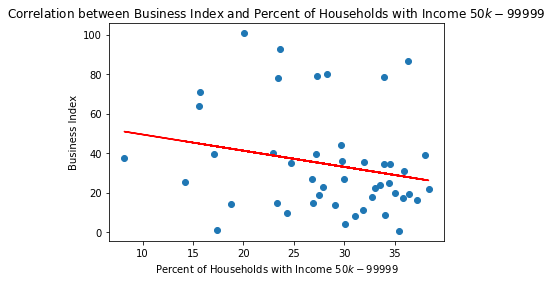

In [74]:
#Regression analysis of income group 50k to 99999 with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["50k to $99999"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income $50k-$99999')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income $50k-$99999")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

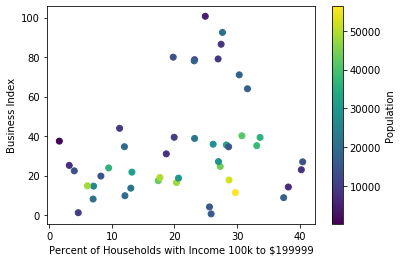

In [75]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["100k to $199999"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 100k to $199999")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.05644625384380503
The p-value is: 0.11186015622972231


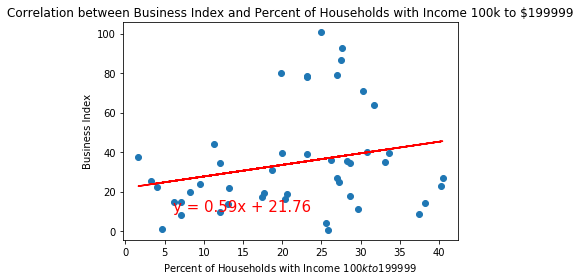

In [76]:
#Regression analysis of income group 100k to $199999 with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["100k to $199999"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income $100k to $199999')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income 100k to $199999")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

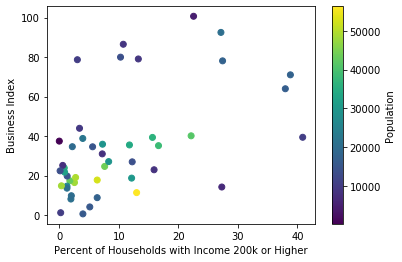

In [81]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["200k and plus"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 200k or Higher")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.27295374007055695
The p-value is: 0.00019575187996695345
The regression line is: y = 1.24x + 21.81


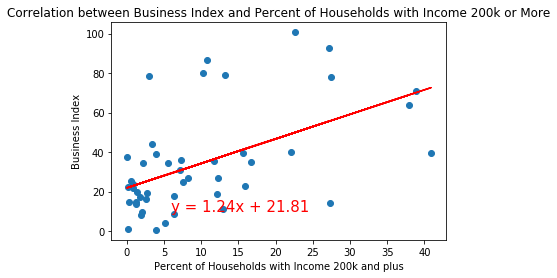

In [84]:
#Regression analysis of income group $200k and plus with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["200k and plus"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income 200k and plus')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income 200k or More")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
print(f"The regression line is: {line_eq}")
plt.show()

In [12]:
#crime_url = 'https://opendata.arcgis.com/datasets/a628ae19fb094f179cc9927a550a55d2_0.geojson'
#print(json.dumps(crime_url, indent=4, sort_keys=True)) 

